## Linear Discriminant Analysis
El Análisis Discriminante Lineal (LDA por sus siglas en inglés) es un método estadístico que trata de encontrar una comnbinación lineal de las variables que caracteriza o separa varias clases. Así, se usa principalmente para:

- Clasificación
- Reducción de dimensionalidad

**Idea**: Proyectar el dataset ( **n** dimensiones) sobre un espacio de dimensión menor (dimensión  
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>k</mi>
  <mo>&lt;</mo>
  <mi>n</mi>
</math>
 ) que nos permita obtener/mantener una buena separabilidad de las clases.

Es muy común aplicar LDA antes de implementar un modelo de clasificación para mejorar los resultados. Asume que los datos de cada clase se distribuyen de forma aproximadamente gaussiana, y busca una combinación lineal de los atributos para separar las clases. LDA **modela la distribución para cada clase** y utiliza el Teorema de Bayes para clasificar puntos.

Idea general
Supongamos que tenemos un dataset con dos clases pero con muchos atributos.

Por un lado, usar todos ellos para entrenar un clasificador puede no ser una buena idea (interdependencia), pero simplemente eliminar algunos de ellos puede ser demasiado simplista. Por ejemplo, se pueden solapar las dos clases en esos atributos:



### Idea general
Supongamos que tenemos un dataset con dos clases pero con muchos atributos.

Por un lado, usar todos ellos para entrenar un clasificador puede no ser una buena idea (interdependencia), pero simplemente eliminar algunos de ellos puede ser demasiado simplista. Por ejemplo, se pueden solapar las dos clases en esos atributos:

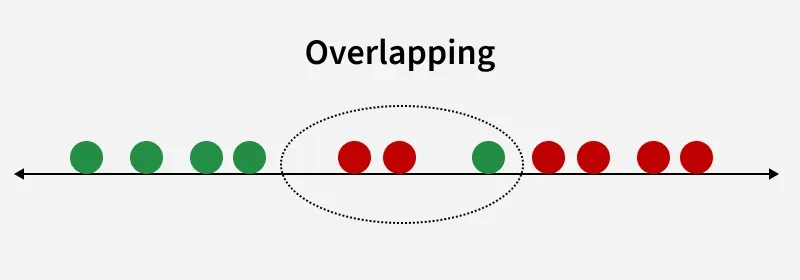

LDA busca una línea (o hiperplano) tal que, si proyectas todos los puntos sobre ella:

- Los grupos queden lo más separados posible.
- Dentro de cada grupo, los puntos queden lo más compactos posible.

Es decir: **Maximizar la separación entre clases / Minimizar la dispersión dentro de cada clase.**

Formalizamos esta idea:

Supongamos que tenemos dos clases, **0** y **1**.

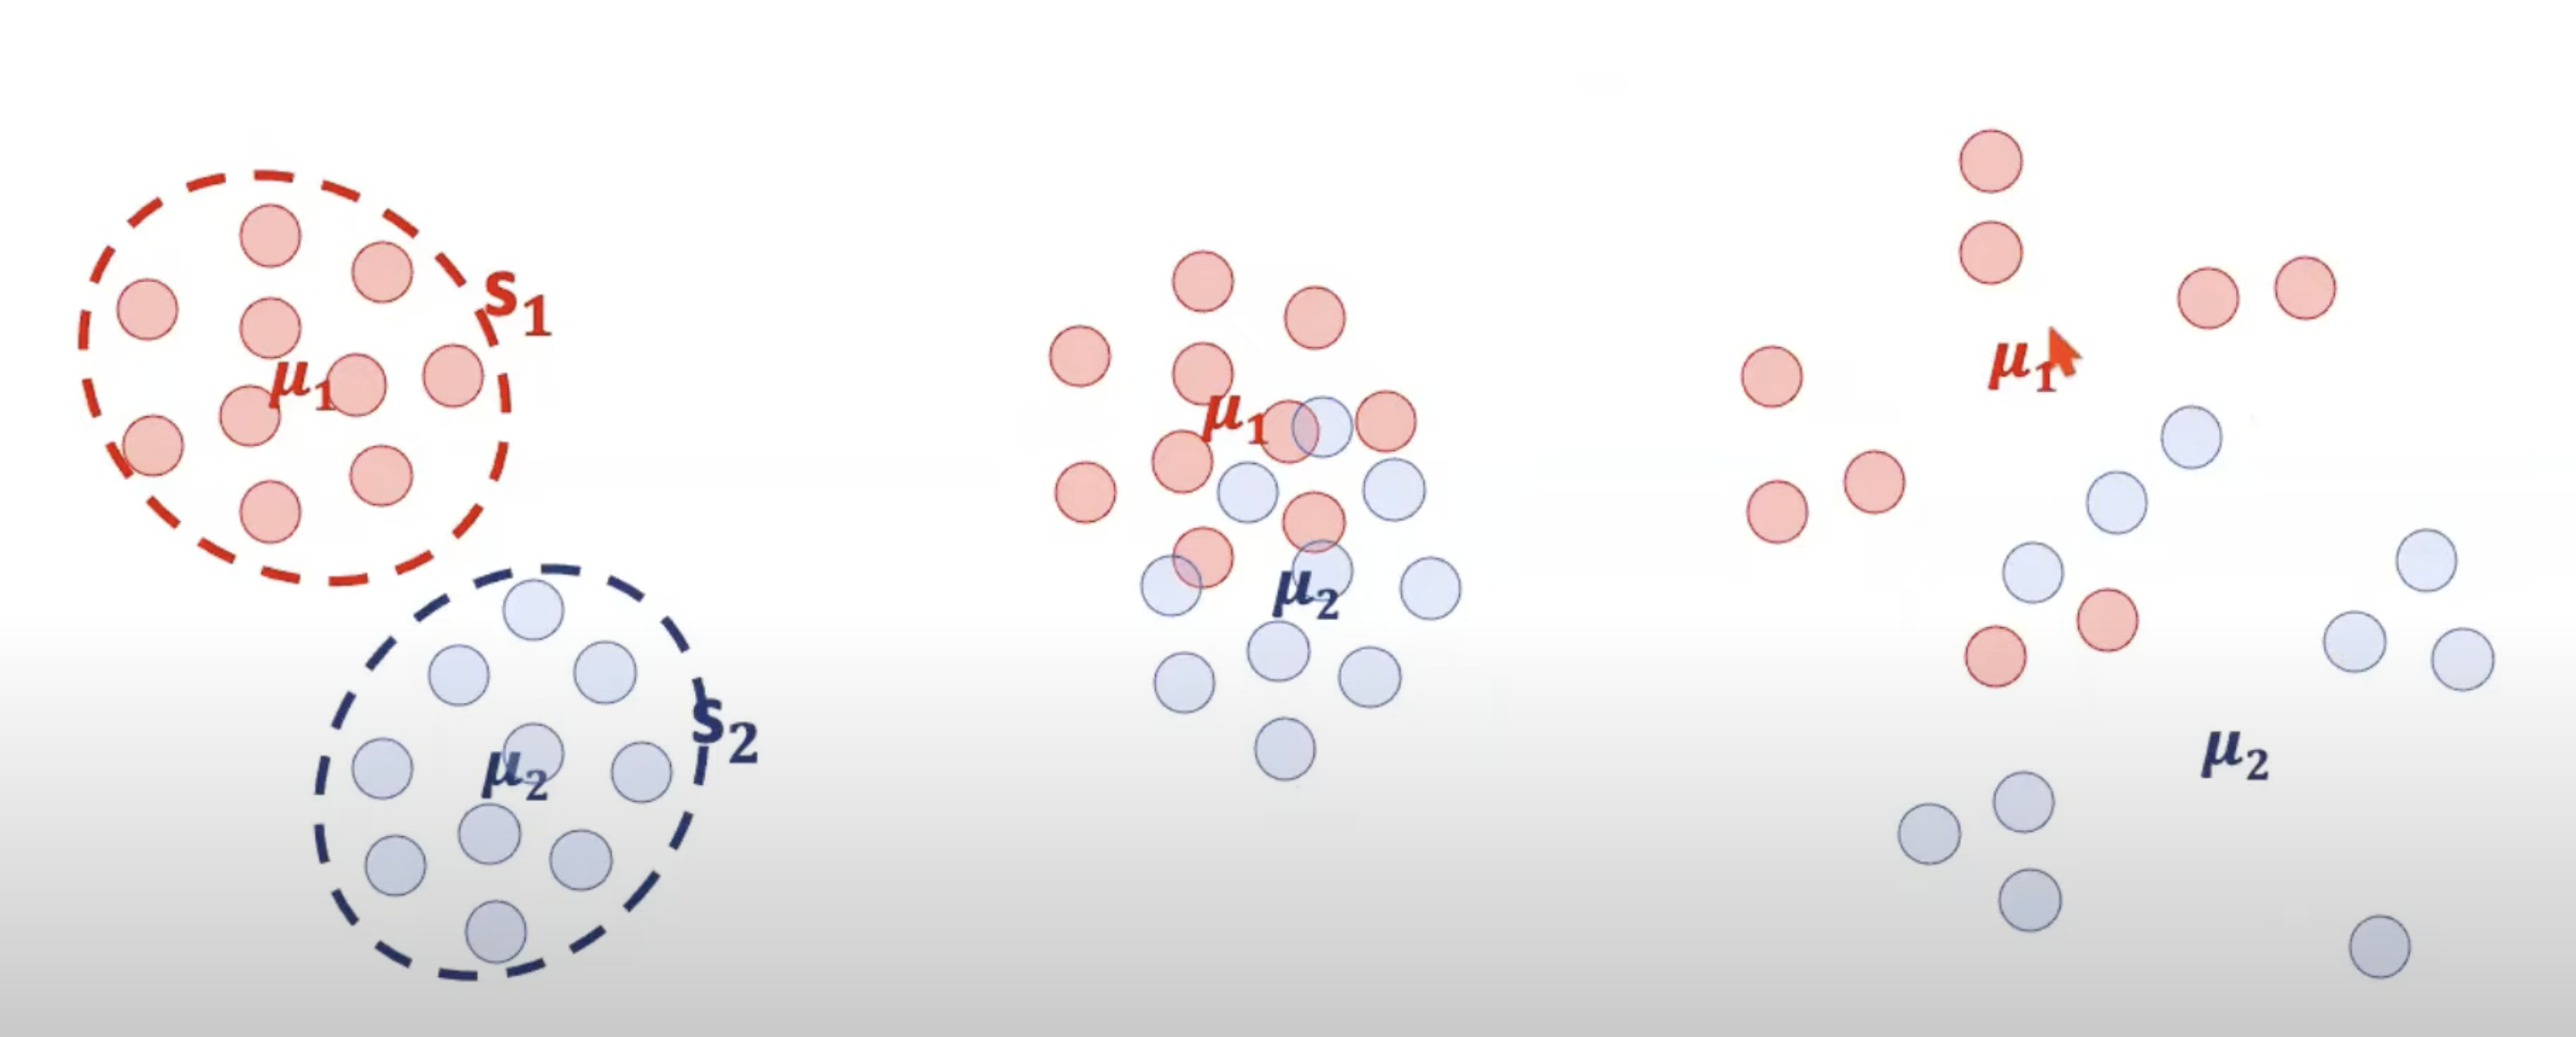

Un clasificador funcionará bien cuando las medias \mu_k
  estén separadas y los elementos de una misma clase estén cerca unos de otros. Es decir:

- <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mi>&#x03BC;<!-- μ --></mi>
    <mn>0</mn>
  </msub>
  <mo>&#x2212;<!-- − --></mo>
  <msub>
    <mi>&#x03BC;<!-- μ --></mi>
    <mn>1</mn>
  </msub>
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
    </msub>
    <mo>queremos que sea grande.</mo>
    </msub>
  </mrow>
</math> 
queremos que sea grande.
σ
2
k
  queremos que sean pequeños.
Al mismo tiempo, queremos reducir el número de variables. Es decir:

Objetivo: Encontrar un subsepacio vectorial de  
R
n
  tal que la proyección de los atributos de nuestro dataset

maximice la distancia entre las medias de las clases y
Minimice la dispersión de todas las clases.
Si proyectamos los puntos sobre una recta genérica, podemos no obtener un buen resultado porque las clases se solapen. Sin embargo, aunque no se solapen el resultado puede no ser óptimo:

|                      |**LDA**|**PCA**|
--------------------------------------------------------------------------------------------------------------------
|Base científica|Basado en transformaciones lineales de los datos|Basado en transformaciones lineales de los datos|
|Tipo de aprendizaje   |Supervisado|	No supervisado|
|Objetivo de las proyecciones|Maximizar la separación entre las clases|Maximizar varianza capturada de cada variable|
|Relaciones |Entre las variables independientes y la variable dependiente (clase)|Entre las variables independientes|

## Implementación

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

In [2]:
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names, data=iris.data)
dataset['target'] = iris.target

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

Escalar y codificar variables

In [3]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

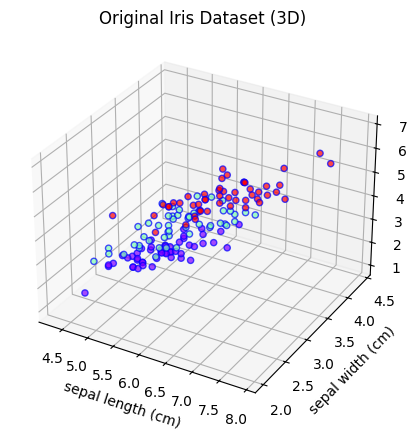

In [4]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('Original Iris Dataset (3D)')
plt.show()

Vamos a usar LDA como paso previo a entrenar un clasificador. En primer lugar, lo vamos a entrenar directamente sobre los datos y vemos cómo es la frontera de decisión resultante:

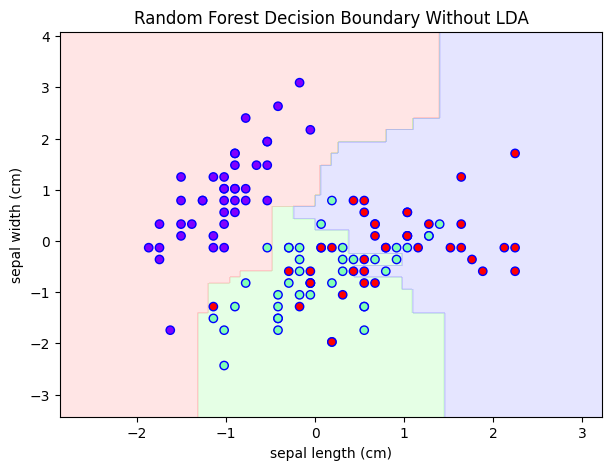

In [5]:
X_train_2D = X_train[:, :2]

rf_without_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_without_lda.fit(X_train_2D, y_train)

x_min, x_max = X_train_2D[:,0].min() - 1, X_train_2D[:,0].max() + 1
y_min, y_max = X_train_2D[:,1].min() - 1, X_train_2D[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_without_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_2D[:,0], X_train_2D[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Random Forest Decision Boundary Without LDA')
plt.show()

Veamos ahora cómo cambia la frontera de decisión si aplicamos LDA antes de entrenar el clasificador.

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

Atención: Fíjate que ajustamos **LDA sólo en el conjunto de entrenamiento** y luego transformamos el conjunto de test con el modelo resultante.

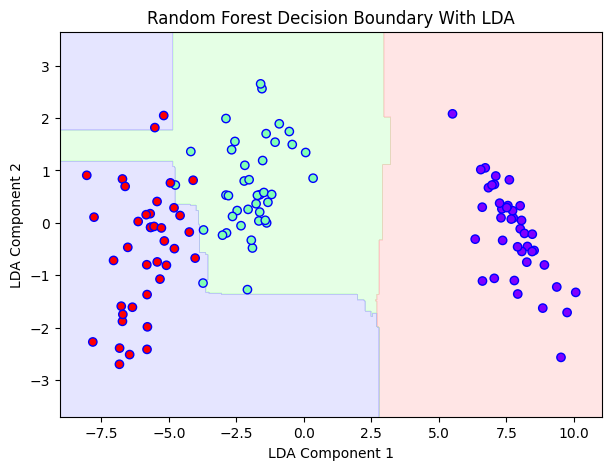

In [7]:
rf_with_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_with_lda.fit(X_train_lda, y_train)

x_min, x_max = X_train_lda[:,0].min() - 1, X_train_lda[:,0].max() + 1
y_min, y_max = X_train_lda[:,1].min() - 1, X_train_lda[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_with_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Random Forest Decision Boundary With LDA')
plt.show()

## Ventajas y limitaciones
### Ventajas
- Sencillo y computacionalmente eficiente.
- Funciona bien incluso cuando hay más atributos que ejemplos de entrenamiento.
- Maneja bien la multicolinearidad.
### Limitaciones
- Asume distribución gaussiana, que no siempre se da.
- Asume misma matriz de covarianza para todas las clases, que no siempre se da.
- Asume separabilidad lineal, y no siempre es el caso.
### Cuándo usar LDA
- Reducir el espacio de variables cuanto tiene dimensión muy alta.